In [10]:
import matplotlib.pyplot as plt
import csv
from GenerateInputSamples import smearings, fluctuate_data_size, n_bootstraps
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import os

In [11]:
data_directory = 'fit_results/'
csv_files = glob.glob(os.path.join(data_directory, 'fit_results_*-v1*.csv'))
data_frames = []

for file in csv_files:
    df = pd.read_csv(file)
    filename = os.path.basename(file)
    smearing_str = filename.split('_')[2].split('-v1')[0]
    smearing = float(smearing_str)
    df['Smearing'] = smearing
    data_frames.append(df)

big_df = pd.concat(data_frames, ignore_index=True)
if 'Parameter' in big_df.columns:
    big_df = big_df[big_df['Parameter'] != 'A']
big_df.dropna(inplace = True)
big_df.drop(['Value', 'Error_Lower'], axis = 1, inplace = True)
big_df.rename(columns={"Error_Upper": "Error"}, inplace = True)

In [18]:
big_df['lower'] = big_df.groupby(['Smearing', 'Fit_Type', 'Parameter'])['Error'].transform(lambda x: x.quantile(0.01))
big_df['upper'] = big_df.groupby(['Smearing', 'Fit_Type', 'Parameter'])['Error'].transform(lambda x: x.quantile(0.99))

filtered_big_df = big_df[(big_df['Error'] >= big_df['lower']) & (big_df['Error'] <= big_df['upper'])]
mean_df = filtered_big_df.groupby(['Smearing', 'Fit_Type', 'Parameter'])['Error'].mean().reset_index()

In [19]:
mean_df = filtered_big_df.groupby(['Smearing', 'Fit_Type', 'Parameter'])['Error'].mean().reset_index()

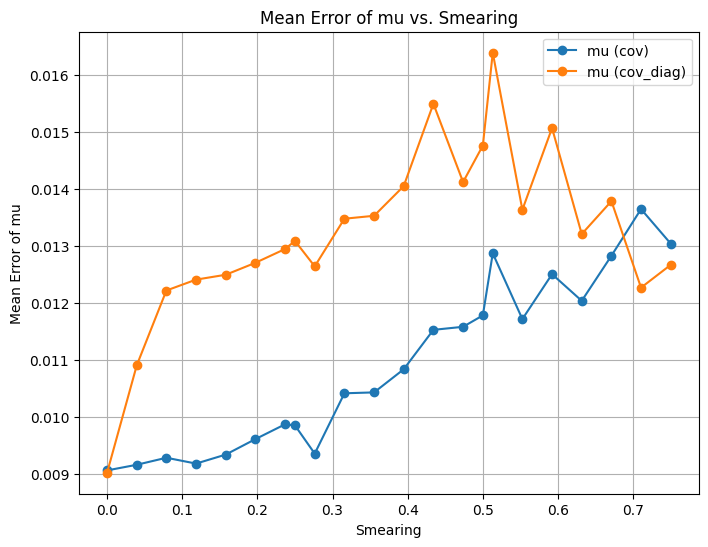

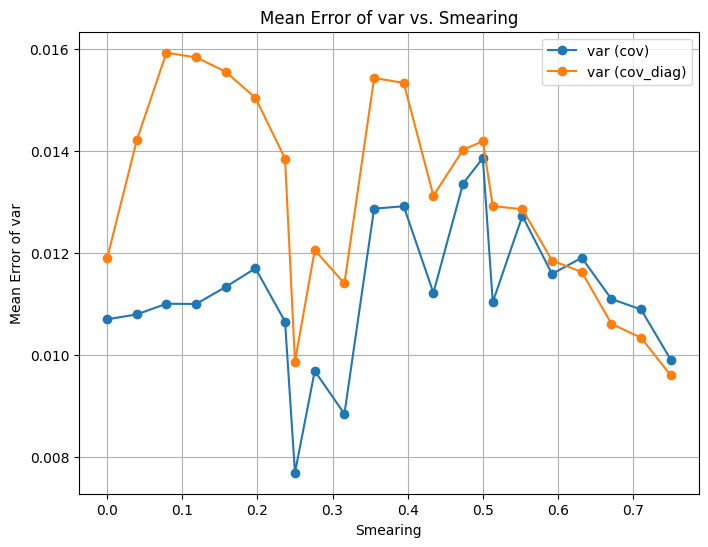

In [20]:
parameters = ['mu', 'var']
fit_types = ['cov', 'cov_diag']

for parameter in parameters:
    plt.figure(figsize=(8, 6))
    for fit_type in fit_types:
        subset = mean_df[(mean_df['Parameter'] == parameter) & (mean_df['Fit_Type'] == fit_type)]
        plt.plot(subset['Smearing'], subset['Error'], marker='o', label=f'{parameter} ({fit_type})')
    plt.xlabel('Smearing')
    plt.ylabel(f'Mean Error of {parameter}')
    plt.title(f'Mean Error of {parameter} vs. Smearing')
    plt.legend()
    plt.grid(True)
    plt.show()